In [2]:
### Implement and train an MLP model on the MultiMNIST dataset

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from torchvision.datasets import ImageFolder

# Set a random seed for reproducibility
torch.manual_seed(0)

# Define the data directory
data_dir = './double_mnist_seed_123_image_size_64_64'

# Define data transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Define the dataset
dataset = ImageFolder(data_dir, transform=transform)

# Define the DataLoader for the dataset
batch_size = 64
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Set hyperparameters
learning_rate = 0.001
input_size = 64 * 64 * 3  # Corrected input size for your dataset
hidden_size = 128
num_classes = 10  # Assuming you want to classify individual digits

# Initialize the model and optimizer
model = MLP(input_size, hidden_size, num_classes)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}] - Loss: {loss.item()}')

# Evaluation on the validation set
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in val_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Validation Accuracy: {accuracy}%')

# # Evaluation on the test set



Epoch [1/10] - Loss: 0.9327079057693481
Epoch [2/10] - Loss: 0.9290419816970825
Epoch [3/10] - Loss: 0.9268123507499695
Epoch [4/10] - Loss: 0.8592595458030701
Epoch [5/10] - Loss: 0.9776791334152222
Epoch [6/10] - Loss: 1.0828932523727417
Epoch [7/10] - Loss: 0.8985559344291687
Epoch [8/10] - Loss: 1.0228029489517212
Epoch [9/10] - Loss: 0.9193823933601379
Epoch [10/10] - Loss: 0.8246817588806152
Validation Accuracy: 63.32%


#### Evaluation on the test set
#### Evalution on the train set

In [3]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test set Accuracy: {accuracy}%')


with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Train set Accuracy: {accuracy}%')

Test set Accuracy: 64.09%
Train set Accuracy: 64.07375%


#### Hyperparameter Tuning: Adjust the number of hidden layers and the number of neurons within each layer to optimize performance and find the best model.

In [4]:
import itertools



# Define the hyperparameter search space
hidden_layer_sizes = [1, 2, 3]  # Number of hidden layers
neurons_per_layer = [64, 128, 256]  # Number of neurons in each layer

best_model = None
best_accuracy = 0.0

# Grid search through the hyperparameter space
for num_layers, num_neurons in itertools.product(hidden_layer_sizes, neurons_per_layer):
    # Define and train the model with the current hyperparameters
    model = MLP(input_size, num_neurons, num_classes)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    ##################

    # train
    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch+1}/{num_epochs}] - Loss: {loss.item()}')

    # Evaluation on the validation set
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f'Validation Accuracy: {accuracy}%')
    ############
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"Best Accuracy: {best_accuracy}%")


Epoch [1/10] - Loss: 0.9755915403366089
Epoch [2/10] - Loss: 0.8356947898864746
Epoch [3/10] - Loss: 0.8324364423751831
Epoch [4/10] - Loss: 0.9502490758895874
Epoch [5/10] - Loss: 0.8857095241546631
Epoch [6/10] - Loss: 1.0500184297561646
Epoch [7/10] - Loss: 1.0570441484451294
Epoch [8/10] - Loss: 0.9917820692062378
Epoch [9/10] - Loss: 1.0315135717391968
Epoch [10/10] - Loss: 0.8267143368721008
Validation Accuracy: 63.32%
Epoch [1/10] - Loss: 0.8746269941329956
Epoch [2/10] - Loss: 0.9590107798576355
Epoch [3/10] - Loss: 0.8966859579086304
Epoch [4/10] - Loss: 0.8422229290008545
Epoch [5/10] - Loss: 0.819499671459198
Epoch [6/10] - Loss: 1.0187956094741821
Epoch [7/10] - Loss: 0.9927339553833008
Epoch [8/10] - Loss: 0.8483586311340332
Epoch [9/10] - Loss: 0.8398551940917969
Epoch [10/10] - Loss: 0.9233770370483398
Validation Accuracy: 63.32%
Epoch [1/10] - Loss: 0.7588663697242737
Epoch [2/10] - Loss: 0.902991533279419
Epoch [3/10] - Loss: 1.0225439071655273
Epoch [4/10] - Loss: 0.8

KeyboardInterrupt: 

#### CNN FOR THE MULTI -DIGIT DATASET

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from torchvision.datasets import ImageFolder

# Set a random seed for reproducibility
torch.manual_seed(0)

# Define the data directory
data_dir = './double_mnist_seed_123_image_size_64_64'

# Define data transforms
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize to 64x64 pixels
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize for 3 color channels
])

# Define the dataset
dataset = ImageFolder(data_dir, transform=transform)

# Define the DataLoader for the dataset
batch_size = 64
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define the CNN model
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Set hyperparameters
learning_rate = 0.001
num_classes = 10  # Assuming you want to classify individual digits

# Initialize the CNN model and optimizer
model = CNN(num_classes)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Training loop
num_epochs = 2
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}] - Loss: {loss.item()}')

# Evaluation on the validation set
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in val_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Validation Accuracy: {accuracy}%')

# Evaluation on the test set
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy}%')


Epoch [1/10] - Loss: 0.9264047741889954
Epoch [2/10] - Loss: 0.5912719368934631
Epoch [3/10] - Loss: 0.4435708820819855
Epoch [4/10] - Loss: 0.35280418395996094
Epoch [5/10] - Loss: 0.18789555132389069
Epoch [6/10] - Loss: 0.23441602289676666
Epoch [7/10] - Loss: 0.08885250985622406
Epoch [8/10] - Loss: 0.024477843195199966
Epoch [9/10] - Loss: 0.20695814490318298
Epoch [10/10] - Loss: 0.012288366444408894
Validation Accuracy: 84.03%
Test Accuracy: 84.0%


In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Train Accuracy: {accuracy}%')

KeyboardInterrupt: 

#### Hyperparameter Tuning: Experiment with different learning rates, kernel sizes, and dropout rates to determine the optimal configuration

In [ ]:
# Define lists of hyperparameters to search over
learning_rates = [0.1, 0.01, 0.001]
kernel_sizes = [(3, 3), (5, 5)]
dropout_rates = [0.0, 0.2, 0.5]

best_accuracy = 0.0
best_hyperparameters = {}

for lr in learning_rates:
    for kernel_size in kernel_sizes:
        for dropout_rate in dropout_rates:
            # Define the model with the current hyperparameters
            model = CNN(num_classes, kernel_size=kernel_size, dropout_rate=dropout_rate)
            optimizer = optim.Adam(model.parameters(), lr=lr)
            
            # Training loop
            num_epochs = 10
            for epoch in range(num_epochs):
                model.train()
                for images, labels in train_loader:
                    optimizer.zero_grad()
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()
            
            # Evaluation on the validation set
            model.eval()
            with torch.no_grad():
                correct = 0
                total = 0
                for images, labels in val_loader:
                    outputs = model(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                accuracy = 100 * correct / total
            
            print(f'Learning Rate: {lr}, Kernel Size: {kernel_size}, Dropout Rate: {dropout_rate}, Validation Accuracy: {accuracy}%')
            
            # Update the best hyperparameters if a better configuration is found
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_hyperparameters = {
                    'learning_rate': lr,
                    'kernel_size': kernel_size,
                    'dropout_rate': dropout_rate
                }

print(f'Best Hyperparameters: {best_hyperparameters}, Best Validation Accuracy: {best_accuracy}%')


#### Testing on Single digit MNIST

In [ ]:
from torchvision.datasets import MNIST


mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize for a single grayscale channel
])

# Load the MNIST dataset
mnist_dataset = MNIST(root='./mnist_dataset', train=True, download=True, transform=mnist_transform)

# Create a DataLoader for the MNIST dataset
mnist_loader = DataLoader(mnist_dataset, batch_size=64, shuffle=False)


# Assuming you have already trained the CNN model and it's stored in the 'model' variable
model.eval()

# Evaluation on the MNIST dataset
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in mnist_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy on MNIST Single-Digit Images: {accuracy:.2f}%')


## Permuted MNIST

In [ ]:
# To load the dataset, you can use np.load
import numpy as np

x_train = np.load("permuted_mnist/train_images.npy")
y_train = np.load("permuted_mnist/train_labels.npy")
x_test = np.load("permuted_mnist/test_images.npy")
y_test = np.load("permuted_mnist/test_labels.npy")

# Split training data into training and validation sets
val_split = 0.2  # You can adjust the split ratio
num_samples = len(x_train)
split_idx = int(num_samples * val_split)

x_val = x_train[:split_idx]
y_val = y_train[:split_idx]

x_train = x_train[split_idx:]
y_train = y_train[split_idx:]

print(np.shape(x_train),np.shape(x_test),np.shape(x_val))


(48000, 28, 28) (10000, 28, 28) (12000, 28, 28)


In [ ]:
# Convert the data to PyTorch tensors
x_train = torch.tensor(x_train, dtype=torch.float).clone().detach()
y_train = torch.tensor(y_train, dtype=torch.long).clone().detach()

x_val = torch.tensor(x_val, dtype=torch.float).clone().detach()
y_val = torch.tensor(y_val, dtype=torch.long).clone().detach()

x_test = torch.tensor(x_test, dtype=torch.float).clone().detach()
y_test = torch.tensor(y_test, dtype=torch.long).clone().detach()

# print(x_train.shape)
# print(y_train.shape)


# print(x_test.shape)
# print(y_test.shape)
# Create DataLoader for training and validation data
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataset = TensorDataset(x_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=32)

## MLP on Permuted-MNIST

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split


# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Initialize the model and optimizer
model = MLP()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        correct = 0
        total = 0
        for batch_x, batch_y in val_loader:
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()

    val_accuracy = 100 * correct / total
    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

# Evaluate the model on the test set
test_dataset = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32)
model.eval()
with torch.no_grad():
    test_loss = 0.0
    correct = 0
    total = 0
    for batch_x, batch_y in test_loader:
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')



NameError: name 'x_train' is not defined

In [ ]:
# Evaluate the model on the val set
val_dataset = TensorDataset(x_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=32)
model.eval()
with torch.no_grad():
    test_loss = 0.0
    correct = 0
    total = 0
    for batch_x, batch_y in val_loader:
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

test_accuracy = 100 * correct / total
print(f'Val Loss: {test_loss:.4f}, Val Accuracy: {test_accuracy:.2f}%')

Val Loss: 64.8324, Val Accuracy: 96.34%


In [ ]:
# Evaluate the model on the train set
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32)
model.eval()
with torch.no_grad():
    test_loss = 0.0
    correct = 0
    total = 0
    for batch_x, batch_y in train_loader:
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

test_accuracy = 100 * correct / total
print(f'Train Loss: {test_loss:.4f}, Train Accuracy: {test_accuracy:.2f}%')

Train Loss: 94.7850, Train Accuracy: 98.10%


### Hyperparameter Tuning: Adjust the number of hidden layers and the number of neurons within each layer to optimize performance and find the best model.

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Assuming x_train, y_train, x_test, and y_test are loaded and 3D
# Flatten the input data
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# Define the hyperparameter search space
param_grid = {
    'hidden_layer_sizes': [(128,), (128, 64), (64, 32, 16)],
    'max_iter': [100, 200, 300],
}

# Create an MLP model
mlp = MLPClassifier(solver='adam')

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train_flattened, y_train)

# Get the best model configuration
best_model = grid_search.best_estimator_

# Flatten the test data
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# Evaluate the best model on the test dataset
test_accuracy = best_model.score(x_test_flattened, y_test)
print(f'Best Model Test Accuracy: {test_accuracy:.2f}')


/home/ubantu/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


## CNN on Permuted-MNIST

Epoch 1/10, Validation Loss: 90.1840, Validation Accuracy: 92.47%
Epoch 2/10, Validation Loss: 73.1474, Validation Accuracy: 93.94%
Epoch 3/10, Validation Loss: 77.5608, Validation Accuracy: 93.85%
Epoch 4/10, Validation Loss: 83.6219, Validation Accuracy: 93.69%
Epoch 5/10, Validation Loss: 77.1314, Validation Accuracy: 94.77%
Epoch 6/10, Validation Loss: 81.7339, Validation Accuracy: 94.27%
Epoch 7/10, Validation Loss: 76.6616, Validation Accuracy: 95.03%
Epoch 8/10, Validation Loss: 87.1500, Validation Accuracy: 94.65%
Epoch 9/10, Validation Loss: 106.9055, Validation Accuracy: 94.14%
Epoch 10/10, Validation Loss: 95.6192, Validation Accuracy: 95.18%


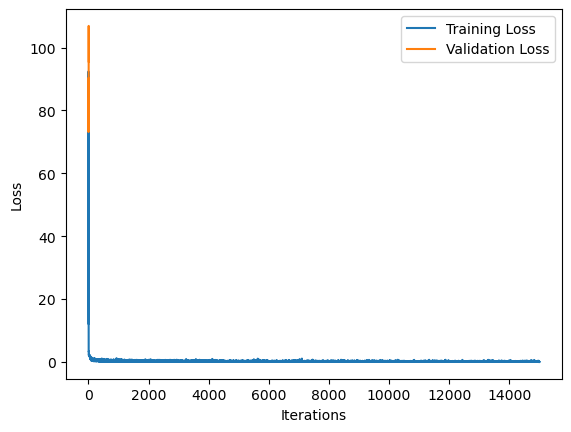

Test Loss: 79.8134, Test Accuracy: 94.84%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Load your data (x_train, y_train, x_val, y_val, x_test, y_test)

# Create DataLoader for training and validation data
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataset = TensorDataset(x_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=32)

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

# Initialize the model and optimizer
model = CNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training loop
num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x.unsqueeze(1))  # Add a channel dimension
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        correct = 0
        total = 0
        for batch_x, batch_y in val_loader:
            outputs = model(batch_x.unsqueeze(1))  # Add a channel dimension
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()
        val_losses.append(val_loss)

    val_accuracy = 100 * correct / total
    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

# Plot training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_dataset = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32)
model.eval()
with torch.no_grad():
    test_loss = 0.0
    correct = 0
    total = 0
    for batch_x, batch_y in test_loader:
        outputs = model(batch_x.unsqueeze(1))  # Add a channel dimension
        loss = criterion(outputs, batch_y)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


#### Train and validation set accuracy

In [ ]:
# Evaluate the model on the Train set
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32)
model.eval()
with torch.no_grad():
    test_loss = 0.0
    correct = 0
    total = 0
    for batch_x, batch_y in train_loader:
        outputs = model(batch_x.unsqueeze(1))  # Add a channel dimension
        loss = criterion(outputs, batch_y)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

test_accuracy = 100 * correct / total
print(f'Train Loss: {test_loss:.4f}, Train Accuracy: {test_accuracy:.2f}%')


# Evaluate the model on the test set
val_dataset = TensorDataset(x_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=32)
model.eval()
with torch.no_grad():
    val_loss = 0.0
    correct = 0
    total = 0
    for batch_x, batch_y in val_loader:
        outputs = model(batch_x.unsqueeze(1))  # Add a channel dimension
        loss = criterion(outputs, batch_y)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

test_accuracy = 100 * correct / total
print(f'Validation Loss: {test_loss:.4f}, Validation Accuracy: {test_accuracy:.2f}%')

Train Loss: 69.6466, Train Accuracy: 98.46%
Validation Loss: 165.2657, Validation Accuracy: 95.18%


#### Hyperparameter Tuning: Experiment with different learning rates, kernel sizes, and dropout rates to determine the optimal configuration.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import itertools

class CNN(nn.Module):
    def __init__(self, learning_rate, kernel_size, dropout_rate):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(dropout_rate)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x


# Define a function for model training and evaluation
def train_and_evaluate(learning_rate, kernel_size, dropout_rate):
    model = CNN(learning_rate, kernel_size, dropout_rate)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    
    # Training loop (similar to previous code)
    
    # Return validation accuracy
    return val_accuracy

# Define the search space for hyperparameters
learning_rates = [0.001, 0.01, 0.1]
kernel_sizes = [3, 5, 7]
dropout_rates = [0.2, 0.5, 0.7]

best_accuracy = 0.0
best_hyperparameters = {}

# Grid search
for lr, kernel_size, dropout_rate in itertools.product(learning_rates, kernel_sizes, dropout_rates):
    val_accuracy = train_and_evaluate(lr, kernel_size, dropout_rate)
    
    # Check if this configuration is better than the previous best
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_hyperparameters = {
            'learning_rate': lr,
            'kernel_size': kernel_size,
            'dropout_rate': dropout_rate
        }

print("Best Hyperparameters:", best_hyperparameters)
print("Best Validation Accuracy:", best_accuracy)

# Train the final model with the best hyperparameters and evaluate on the test set
final_model = CNN(best_hyperparameters['learning_rate'], best_hyperparameters['kernel_size'], best_hyperparameters['dropout_rate'])
# Training loop for the final model
# Evaluate on the test set


Best Hyperparameters: {'learning_rate': 0.001, 'kernel_size': 3, 'dropout_rate': 0.2}
Best Validation Accuracy: 95.18333333333334
